In [1]:
import pandas as pd
import numpy as np
#loading the file customer.csv
customer = pd.read_csv('./Customers.csv')
print(customer.shape)
customer.head()


(2000, 8)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [2]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [3]:
#printing the unique values in descending order for each column
for column in customer.columns:
    print(column)
    print(customer[column].sort_values(ascending=False).unique())
    print('\n')

CustomerID
[2000 1999 1998 ...    3    2    1]


Gender
['Male' 'Female']


Age
[99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76
 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52
 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28
 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4
  3  2  1  0]


Annual Income ($)
[189974 189945 189709 ...   2000   1000      0]


Spending Score (1-100)
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1   0]


Profession
['Marketing' 'Lawyer' 'Homemaker' 'Healthcare' 'Executive' 'Entertainment'
 'Engineer' 'Doctor' '

In [4]:
#dropping the missing values
customer_cleaned = customer.dropna()

#deleting the column customerID
del customer_cleaned['CustomerID']

customer_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1965 non-null   object
 1   Age                     1965 non-null   int64 
 2   Annual Income ($)       1965 non-null   int64 
 3   Spending Score (1-100)  1965 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         1965 non-null   int64 
 6   Family Size             1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 122.8+ KB


In [5]:
customer_cleaned.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,48.894656,110616.009669,51.078880,4.092621,3.757252
std,28.414889,45833.860195,27.977176,3.926459,1.968335
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,73.000000,149095.000000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
preprocess_df = customer_cleaned.copy()
statistics = customer_cleaned.describe()

# To get the mean and standard deviation for 'Age'
age_mean = statistics.loc['mean', 'Age']
age_std = statistics.loc['std', 'Age']

# To get the mean and standard deviation for 'Annual Income ($)'
annual_income_mean = statistics.loc['mean', 'Annual Income ($)']
annual_income_std = statistics.loc['std', 'Annual Income ($)']

# To get the mean and standard deviation for 'Spending Score (1-100)'
spending_score_mean = statistics.loc['mean', 'Spending Score (1-100)']
spending_score_std = statistics.loc['std', 'Spending Score (1-100)']

# To get the mean and standard deviation for 'Work Experience (in years)'
work_experience_mean = statistics.loc['mean', 'Work Experience']
work_experience_std = statistics.loc['std', 'Work Experience']

# To get the mean and standard deviation for 'Family Size'
family_size_mean = statistics.loc['mean', 'Family Size']
family_size_std = statistics.loc['std', 'Family Size']

print('Age mean: ', age_mean)
print('Age std: ', age_std)
print('Annual Income ($) mean: ', annual_income_mean)
print('Annual Income ($) std: ', annual_income_std)

Age mean:  48.89465648854962
Age std:  28.414888759314916
Annual Income ($) mean:  110616.0096692112
Annual Income ($) std:  45833.860194848356


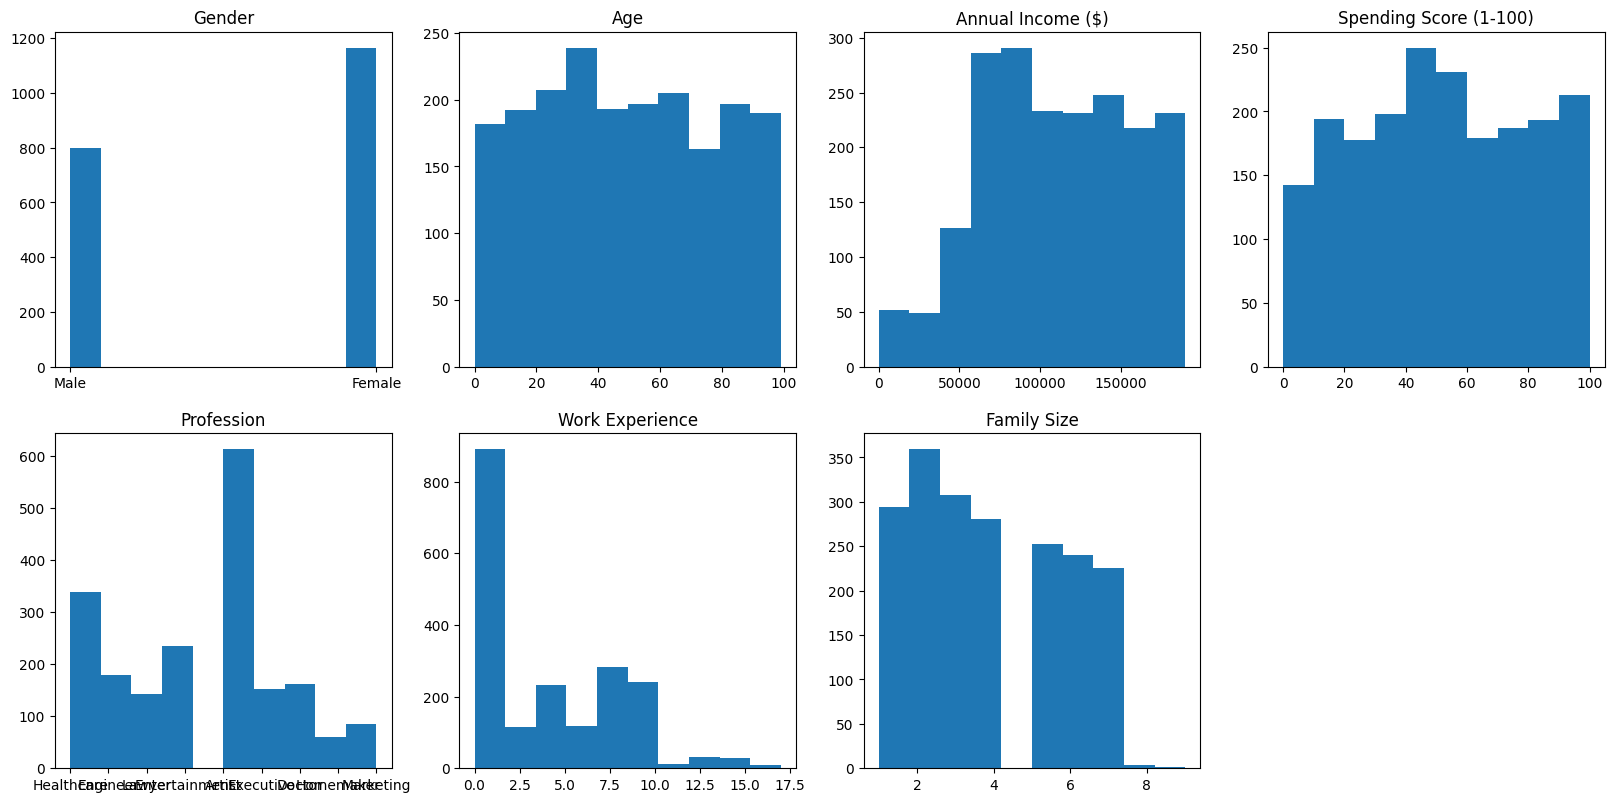

In [7]:
#plotting in subplots the distribution of each column
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
i = 1
plt.figure(figsize=(20, 20))
for column in customer_cleaned.columns:
    plt.subplot(4, 4, i)
    plt.hist(customer_cleaned[column])
    plt.title(column)
    i += 1
plt.show()


In [8]:
#converting categorical columns to numerical columns using one hot encoding
categorical_columns = ['Gender','Profession']
customer_cleaned2 = pd.get_dummies(customer_cleaned, columns=categorical_columns, dtype=int)
customer_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1965 non-null   int64
 1   Annual Income ($)         1965 non-null   int64
 2   Spending Score (1-100)    1965 non-null   int64
 3   Work Experience           1965 non-null   int64
 4   Family Size               1965 non-null   int64
 5   Gender_Female             1965 non-null   int64
 6   Gender_Male               1965 non-null   int64
 7   Profession_Artist         1965 non-null   int64
 8   Profession_Doctor         1965 non-null   int64
 9   Profession_Engineer       1965 non-null   int64
 10  Profession_Entertainment  1965 non-null   int64
 11  Profession_Executive      1965 non-null   int64
 12  Profession_Healthcare     1965 non-null   int64
 13  Profession_Homemaker      1965 non-null   int64
 14  Profession_Lawyer         1965 non-null   int

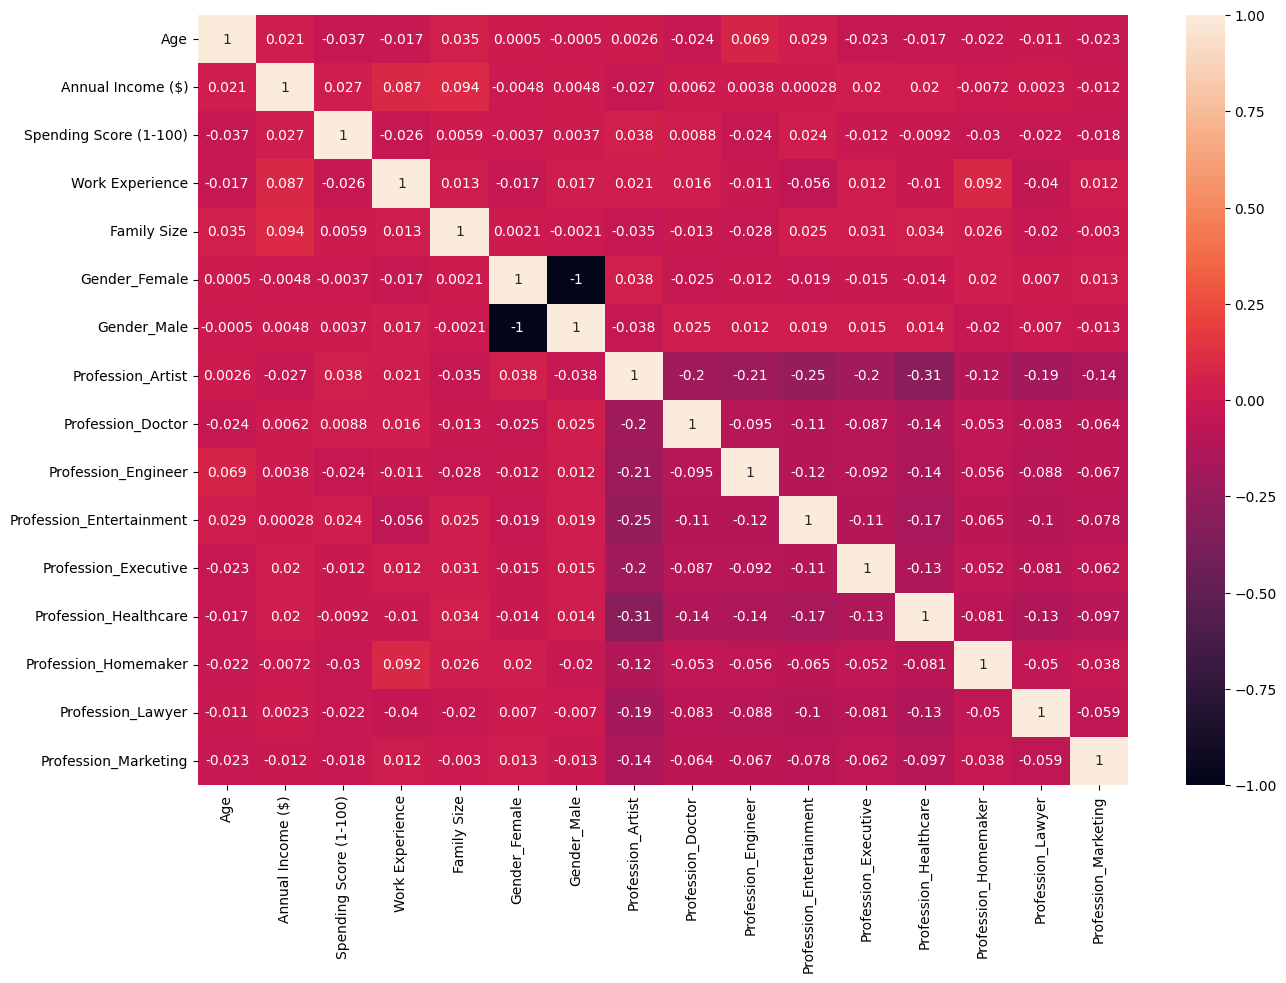

In [9]:
#plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(customer_cleaned2.corr(), annot=True)
plt.show()

In [10]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_cleaned_scaled = scaler.fit_transform(customer_cleaned2)
customer_cleaned_scaled = pd.DataFrame(customer_cleaned_scaled, columns=customer_cleaned2.columns)
#print(customer_cleaned_scaled.head())
print(customer_cleaned_scaled.describe())

# saving the cleaned data to a new dataframe
customer_df_cloned = customer_cleaned_scaled.copy()


                Age  Annual Income ($)  Spending Score (1-100)  \
count  1.965000e+03       1.965000e+03            1.965000e+03   
mean  -1.301758e-16      -8.678385e-17            1.139038e-16   
std    1.000255e+00       1.000255e+00            1.000255e+00   
min   -1.721179e+00      -2.414027e+00           -1.826199e+00   
25%   -8.411343e-01      -7.914507e-01           -8.251281e-01   
50%   -3.149350e-02      -1.870294e-02           -3.857269e-02   
75%    8.485509e-01       8.397457e-01            8.552403e-01   
max    1.763797e+00       1.731868e+00            1.749053e+00   

       Work Experience   Family Size  Gender_Female   Gender_Male  \
count     1.965000e+03  1.965000e+03   1.965000e+03  1.965000e+03   
mean      1.446397e-17 -4.339192e-17   5.423990e-18 -5.423990e-18   
std       1.000255e+00  1.000255e+00   1.000255e+00  1.000255e+00   
min      -1.042584e+00 -1.401161e+00  -1.208025e+00 -8.277975e-01   
25%      -7.878366e-01 -8.929878e-01  -1.208025e+00 -8.27797

In [11]:
#applying PCA to plot the data in 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
customer_cleaned_pca = pca.fit_transform(customer_cleaned_scaled)
print(customer_cleaned_pca.shape)
#printing the explained variance ratio
print(pca.explained_variance_ratio_.sum())

(1965, 2)
0.21029881395187577


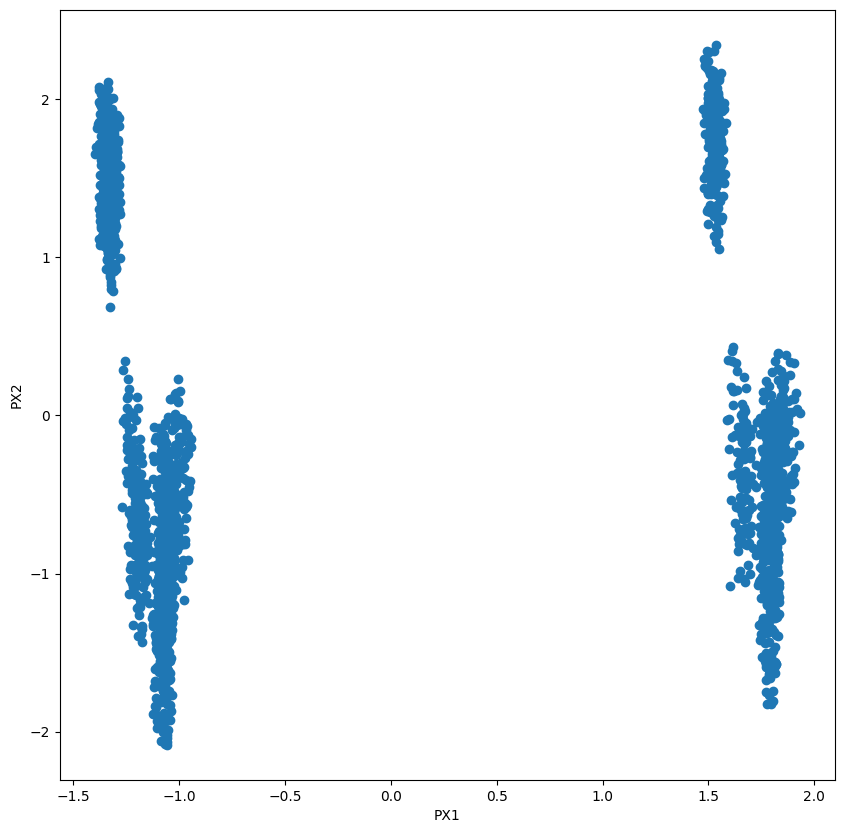

In [12]:
#plotting the data in 2 dimensions
plt.figure(figsize=(10, 10))
plt.scatter(customer_cleaned_pca[:, 0], customer_cleaned_pca[:, 1])
plt.xlabel('PX1')
plt.ylabel('PX2')
plt.show()


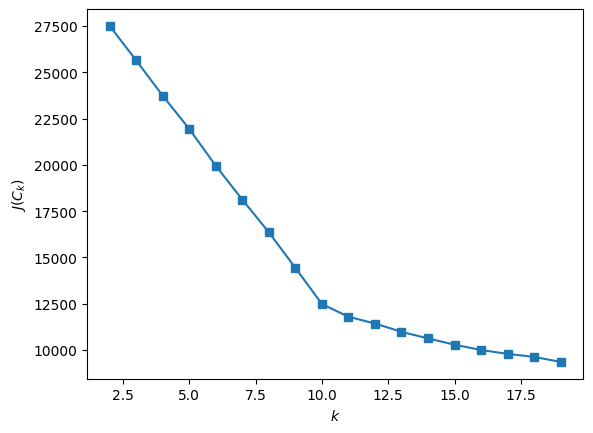

In [13]:
#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(customer_cleaned_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

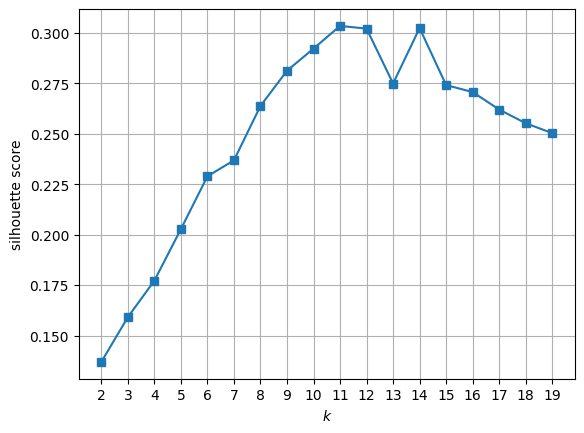

In [14]:
#using the silhouette score to find the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(customer_cleaned_scaled)
    silhouette.append(silhouette_score(customer_cleaned_scaled, kmeans.labels_))
plt.plot(range(2, 20), silhouette, marker='s')
plt.xticks(range(2, 20))
plt.xlabel('$k$')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()


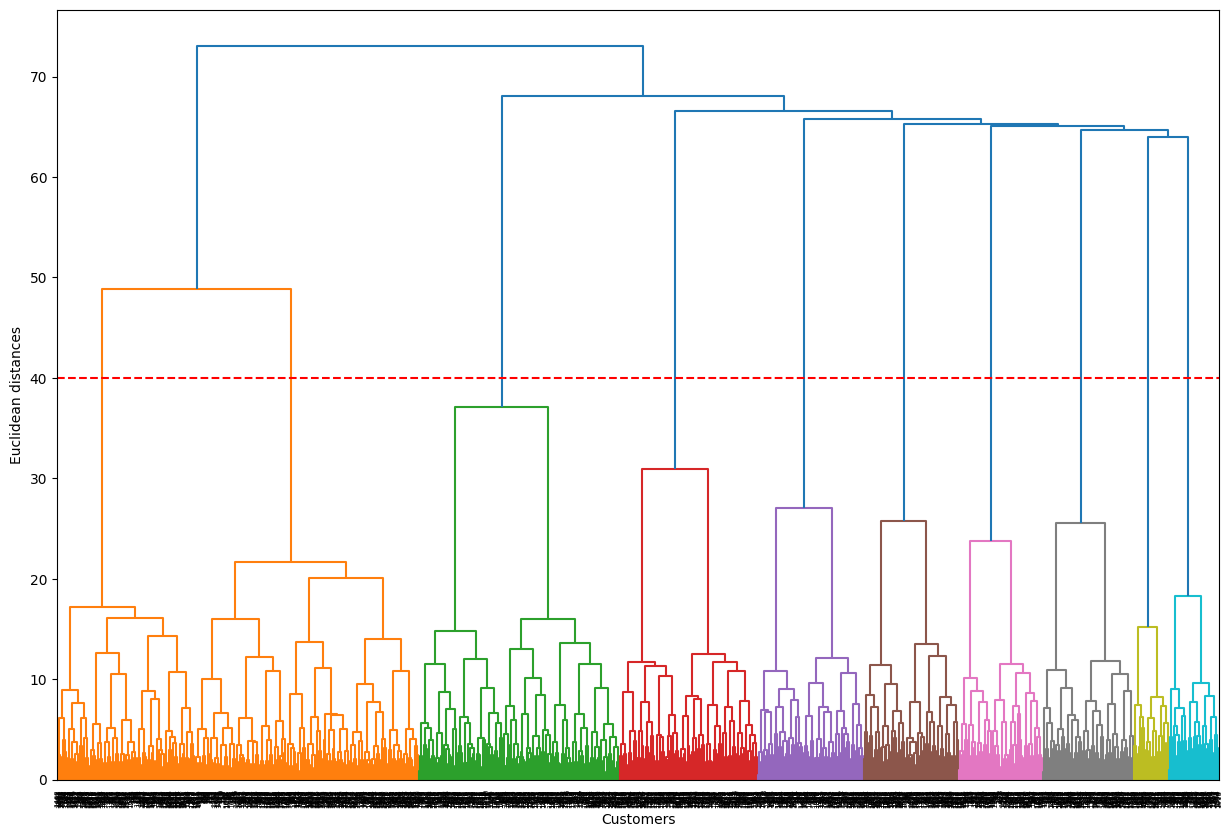

In [15]:
#using agglomerative clustering to plot the dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(customer_cleaned_scaled, method='ward'))
#tracing the horizontal line with distance equals 40
plt.axhline(y=40, color='r', linestyle='--')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [16]:
#After analysing the dendrogram, the inertia elbow and silhouette score we can see that the optimal number of clusters is 10.
#applying kmeans clustering with 10 clusters
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10).fit(customer_cleaned_scaled)
np.set_printoptions(threshold=1000) #(threshold=np.inf)
print(kmeans_10.labels_)

[2 6 6 ... 2 7 5]


In [17]:
#creating a dataframe with the cluster labels
customer_cleaned_scaled_clustered = customer_cleaned_scaled.copy()
customer_cleaned_scaled_clustered['cluster'] = kmeans_10.labels_
print(customer_cleaned_scaled_clustered.head())

        Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.052345          -2.086675               -0.431850        -0.787837   
1 -0.981941          -1.650205                1.069755        -0.278342   
2 -1.017143          -0.537207               -1.611684        -0.787837   
3 -0.911538          -1.126441                0.926745        -1.042584   
4 -0.629924          -1.584734               -0.396098        -0.533089   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0     0.123358      -1.208025     1.208025          -0.672553   
1    -0.384815      -1.208025     1.208025          -0.672553   
2    -1.401161       0.827798    -0.827798          -0.672553   
3    -0.892988       0.827798    -0.827798          -0.672553   
4     1.139704       0.827798    -0.827798          -0.672553   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0          -0.298741            -0.316582                 -0.367671   
1          -0.29

In [18]:
# apply 3 clusters to the kmeans algorithm
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(customer_df_cloned)
customer_df_cloned_plot = customer_df_cloned.copy()
customer_df_cloned_plot['Customer segment'] = kmeans_3.labels_
# print(customer_df_cloned_plot.head())

print(customer_df_cloned_plot['Customer segment'].value_counts())
customer_df_analysis = customer_df_cloned_plot.groupby('Customer segment').mean()
customer_df_analysis

Customer segment
0    1080
1     743
2     142
Name: count, dtype: int64


,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Customer segment,,,,,,,,,,,,,,,,
0,0.004034,-0.001466,0.000887,-0.005668,0.005725,0.827798,-0.827798,0.087244,0.001727,0.014861,0.012548,0.010050,0.023721,0.032413,-0.279094,0.028594
1,0.001813,0.000547,0.013877,0.035720,0.005035,-1.208025,1.208025,0.001722,0.054585,0.038902,0.052029,0.040927,0.052785,-0.013197,-0.279094,-0.000926
2,-0.040170,0.008289,-0.079361,-0.143793,-0.069891,0.024938,-0.024938,-0.672553,-0.298741,-0.316582,-0.367671,-0.290581,-0.456604,-0.177471,3.583019,-0.212633


In [19]:
customer_df_analysis.rename({0: 'Standard Customer', 1: 'Target Audience', 2: 'Lower spenders'})

# Map 'Customer segment' to new labels and assign it to 'Labels'
customer_df_cloned_plot['Labels'] = customer_df_cloned_plot['Customer segment'].map({
    0: 'Standard Customer', 
    1: 'Target Audience', 
    2: 'Lower spenders'
})

/var/folders/_w/y025p4hs6mbdx0xns5tf3src0000gq/T/ipykernel_52447/2881773143.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


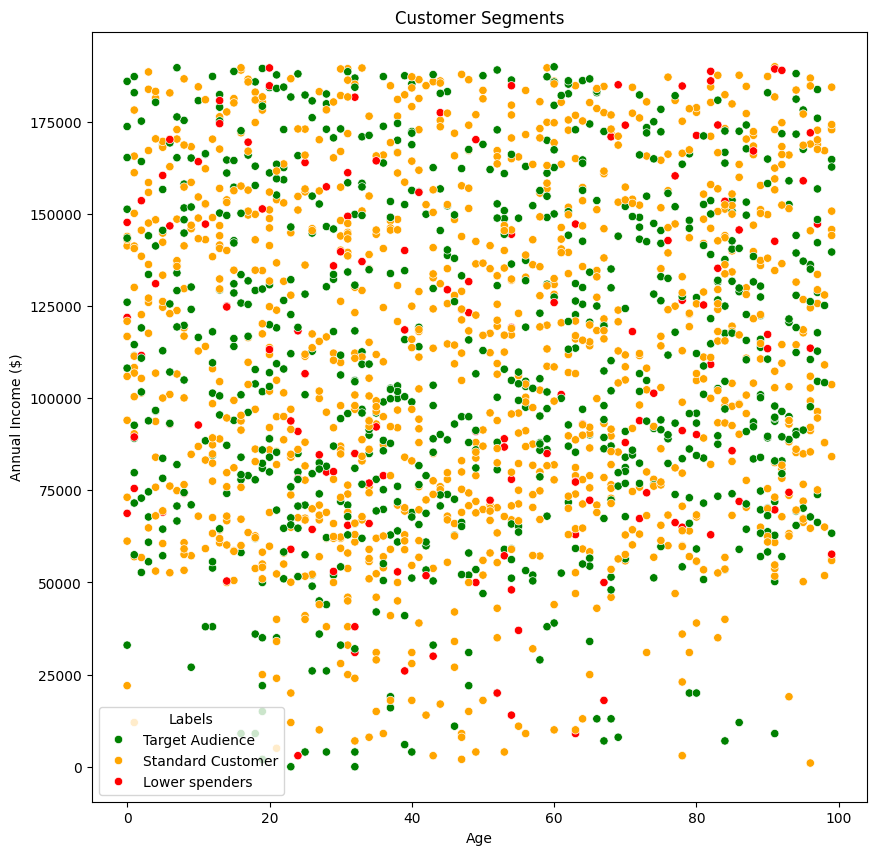

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inverse transformation
x_data = customer_df_cloned_plot['Age'] * age_std + age_mean
y_data = customer_df_cloned_plot['Annual Income ($)'] * annual_income_std + annual_income_mean

# Creating the figure
plt.figure(figsize=(10, 10))

# Creating the scatter plot
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=customer_df_cloned_plot['Labels'],
    palette=['green', 'orange', 'red', 'blue']
)

# Adding title and labels for clarity
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

# Display the plot
plt.show()

In [21]:
# apply 10 clusters to the kmeans algorithm
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10).fit(customer_df_cloned)
customer_df_cloned_plot10 = customer_df_cloned.copy()
customer_df_cloned_plot10['Customer segment'] = kmeans_10.labels_

print(customer_df_cloned_plot10['Customer segment'].value_counts())
customer_df_analysis10 = customer_df_cloned_plot10.groupby('Customer segment').mean()
customer_df_analysis10_sorted = customer_df_analysis10.sort_values(by='Spending Score (1-100)', ascending=False)

# Create a mapping for the sorted segments to 'Priority 1' to 'Priority 10'
priority_mapping = {index: f'Priority {i+1}' for i, index in enumerate(customer_df_analysis10_sorted.index)}

# Rename the index using the mapping
customer_df_analysis10_sorted.rename(index=priority_mapping, inplace=True)


customer_df_analysis10_sorted
priority_mapping

Customer segment
0    380
2    339
5    234
1    232
6    179
9    161
7    153
8    142
3     85
4     60
Name: count, dtype: int64


{1: 'Priority 1',
 5: 'Priority 2',
 9: 'Priority 3',
 0: 'Priority 4',
 2: 'Priority 5',
 7: 'Priority 6',
 6: 'Priority 7',
 8: 'Priority 8',
 3: 'Priority 9',
 4: 'Priority 10'}

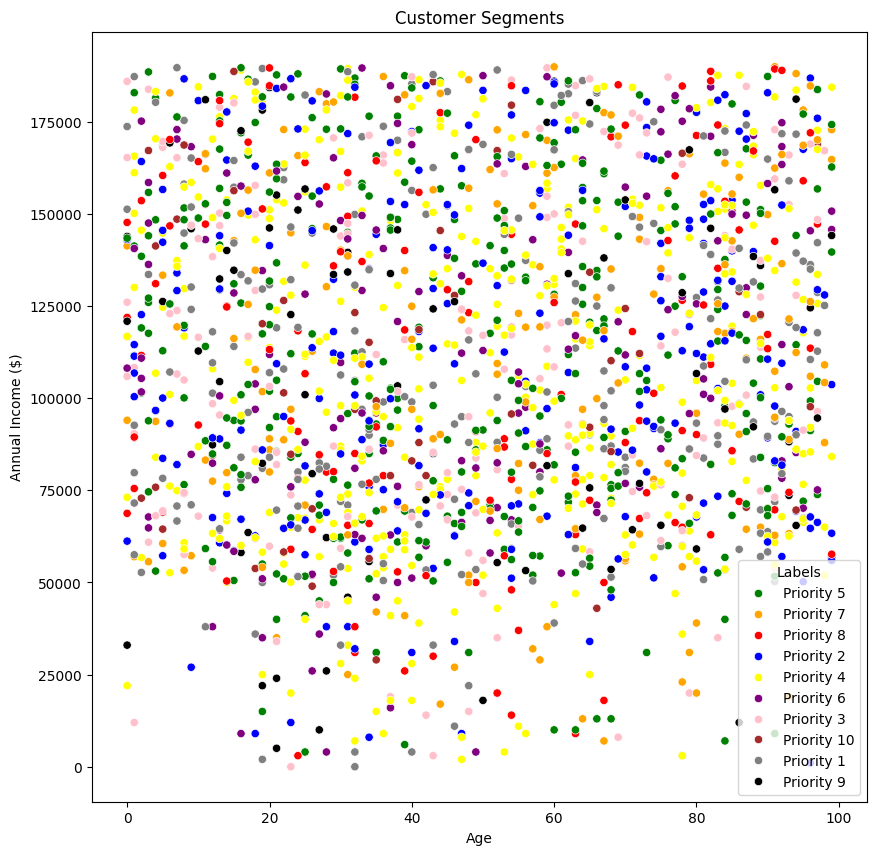

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map 'Customer segment' to new labels and assign it to 'Labels'
customer_df_cloned_plot10['Labels'] = customer_df_cloned_plot10['Customer segment'].map(priority_mapping)

# Inverse transformation
x_data = customer_df_cloned_plot10['Age'] * age_std + age_mean
y_data = customer_df_cloned_plot10['Annual Income ($)'] * annual_income_std + annual_income_mean

# Creating the figure
plt.figure(figsize=(10, 10))

# Creating the scatter plot
sns.scatterplot(
    x=x_data,
    y=y_data,
    hue=customer_df_cloned_plot10['Labels'],
    palette=['green', 'orange', 'red', 'blue', 'yellow', 'purple', 'pink', 'brown', 'gray', 'black']
)

# Adding title and labels for clarity
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

# Display the plot
plt.show()

In [23]:
"""
re-preprocessing the data
"""
columns_to_update = {
    'Annual Income ($)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}

preprocess_df = preprocess_df.rename(columns=columns_to_update)

# Create a new feature that represents annual income per family member.
preprocess_df['IncomePerMember'] = preprocess_df['Annual Income'] / preprocess_df['Family Size']

# Categorize spending scores into different groups.
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
preprocess_df['SpendingScoreCategory'] = pd.cut(preprocess_df['Spending Score'], bins=bins, labels=labels, right=False)

# Categorize work experience into different groups.
bins = [0, 5, 10, 15, 20]
labels = ['Entry', 'Mid', 'Senior', 'Expert']
preprocess_df['ExperienceLevel'] = pd.cut(preprocess_df['Work Experience'], bins=bins, labels=labels, right=False)

# Create a new feature representing the ratio of annual income to work experience.
preprocess_df['Income_Experience_Ratio'] = preprocess_df['Annual Income'] / (1 + preprocess_df['Work Experience'])

# Create a new feature 'FamilySizeCategory' representing family size groups
bins_family = [0, 3, 5, float('inf')]
labels_family = ['Small', 'Medium', 'Large']
preprocess_df['FamilySizeCategory'] = pd.cut(preprocess_df['Family Size'], bins=bins_family, labels=labels_family, right=False)

preprocess_df.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory
0,Male,19,15000,39,Healthcare,1,4,3750.000000,Low,Entry,7500.000000,Medium
1,Male,21,35000,81,Engineer,3,3,11666.666667,Very High,Entry,8750.000000,Medium
2,Female,20,86000,6,Engineer,1,1,86000.000000,Very Low,Entry,43000.000000,Small
3,Female,23,59000,77,Lawyer,0,2,29500.000000,High,Entry,59000.000000,Small
4,Female,31,38000,40,Entertainment,2,6,6333.333333,Moderate,Entry,12666.666667,Large


In [24]:
from sklearn.calibration import LabelEncoder

preprocess_df['Age Group'] = pd.cut(preprocess_df['Age'], 
                                    bins=[0, 20, 30, 40, 50, 60, float('inf')],
                                    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Encoding categorical variables
label_encoder = LabelEncoder()
preprocess_df['Gender'] = label_encoder.fit_transform(preprocess_df['Gender'])
preprocess_df['Profession'] = label_encoder.fit_transform(preprocess_df['Profession'])

print(preprocess_df['Profession'].unique())
original_profession_labels = label_encoder.inverse_transform(preprocess_df['Profession'])
print(original_profession_labels)

preprocess_df['Age Group'] = label_encoder.fit_transform(preprocess_df['Age Group'])
preprocess_df['SpendingScoreCategory'] = label_encoder.fit_transform(preprocess_df['SpendingScoreCategory'])
preprocess_df['ExperienceLevel'] = label_encoder.fit_transform(preprocess_df['ExperienceLevel'])
preprocess_df['FamilySizeCategory'] = label_encoder.fit_transform(preprocess_df['FamilySizeCategory'])

# Standardizing numerical variables
numerical_cols = ['Work Experience', 'Family Size', 'IncomePerMember', 'Income_Experience_Ratio', 'Spending Score']
scaler = StandardScaler()
preprocess_df[numerical_cols] = scaler.fit_transform(preprocess_df[numerical_cols])
preprocess_df.head()

[5 2 7 3 0 4 1 6 8]
['Healthcare' 'Engineer' 'Engineer' ... 'Healthcare' 'Executive'
 'Entertainment']


,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory,Age Group
0,1,19,15000,-0.431850,5,-0.787837,0.123358,-1.025051,1,0,-0.844118,1,0
1,1,21,35000,1.069755,2,-0.278342,-0.384815,-0.816114,3,0,-0.815684,1,1
2,0,20,86000,-1.611684,2,-0.787837,-1.401161,1.145689,4,0,-0.036607,2,0
3,0,23,59000,0.926745,7,-1.042584,-0.892988,-0.345457,0,0,0.327341,2,1
4,0,31,38000,-0.396098,3,-0.533089,1.139704,-0.956872,2,0,-0.726593,0,2


silhouette_scores: [0.618854860906778, 0.5575381547147576, 0.5330869745650374, 0.5607629112889093, 0.5710958873084109, 0.5464928672813365, 0.5477355672911992, 0.5514721881658825, 0.5533574291350442], scores: [1134857649186.2695, 586952424515.8033, 357522562056.9484, 213726728972.7879, 137878099042.71674, 106494111162.56848, 82715302855.4325, 64632297231.45292, 51480591474.55355]


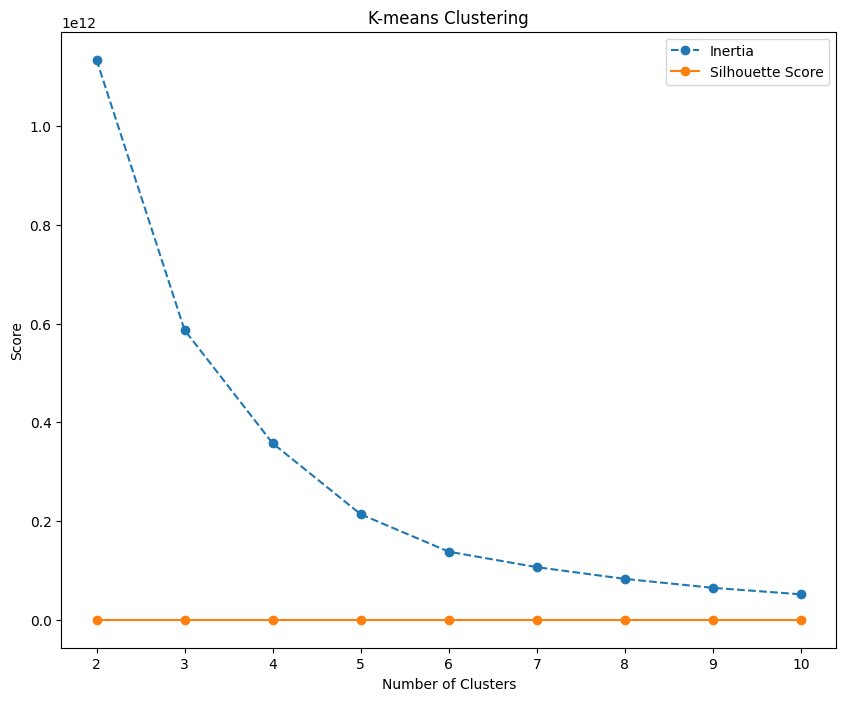

In [25]:
silhouette_scores = []
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(preprocess_df)
    scores.append(kmeans.inertia_)
    labels = kmeans.labels_
    if len(set(labels)) > 1:  # Check to ensure there are at least 2 unique clusters
        silhouette_scores.append(silhouette_score(preprocess_df, labels))


# plt.figure(figsize = (10,8))
# plt.plot(range(1, 11), scores, marker = 'o', linestyle = '--')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Scores')
# plt.title('K-means Clustering')
# plt.show()
print(f'silhouette_scores: {silhouette_scores}, scores: {scores}')

plt.figure(figsize=(10,8))

# Ensure the x-axis range matches the length of the scores list
# Since the range starts at 2, the x-values should start at 2 as well
plt.plot(range(2, 11), scores, marker='o', linestyle='--')
plt.plot(range(2, 11), silhouette_scores, marker='o')  # Plot silhouette scores with the correct range

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('K-means Clustering')
plt.legend(['Inertia', 'Silhouette Score'])
plt.show()

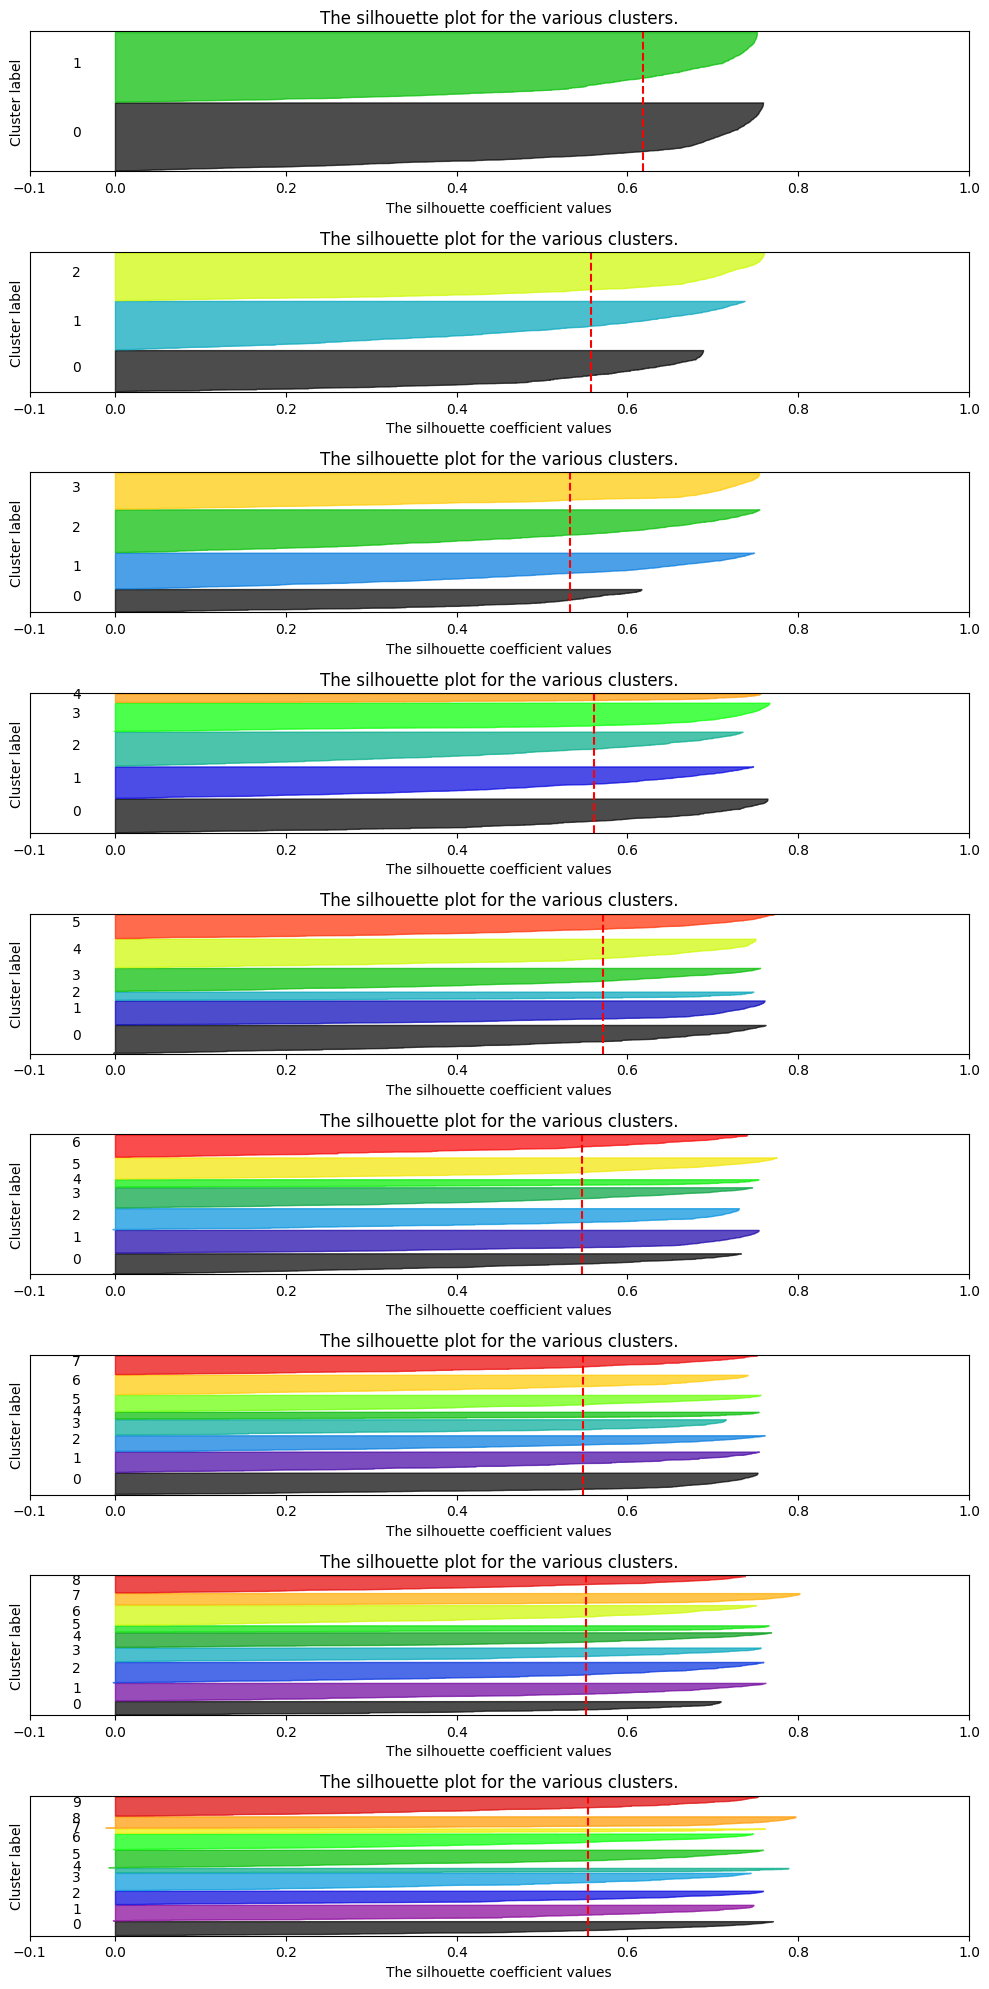

In [26]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

# Set up the grid for plotting multiple silhouette diagrams
n_clusters_list = range(2, 11)
n_rows = len(n_clusters_list)
fig, axes = plt.subplots(n_rows, 1)
fig.set_size_inches(10, 20)

# Iterate over each number of clusters
for idx, n_clusters in enumerate(n_clusters_list):
    # Create a subplot for each number of clusters
    ax = axes[idx]
    
    # The silhouette coefficient can range from -1, 1
    ax.set_xlim([-0.1, 1])
    # Insert some space between plots for clarity
    ax.set_ylim([0, len(preprocess_df) + (n_clusters + 1) * 10])
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(preprocess_df)
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette scores for each sample
    silhouette_vals = silhouette_samples(preprocess_df, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers in the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10
    
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_score(preprocess_df, cluster_labels), color="red", linestyle="--")
    
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
# Adjust layout
plt.tight_layout()
plt.show()


/Users/PortalNetworkNew/Desktop/處理區/centennial_college/2023Fall/unspervised/group/COMP257_UnspLearning_Grp08/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/PortalNetworkNew/Desktop/處理區/centennial_college/2023Fall/unspervised/group/COMP257_UnspLearning_Grp08/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/PortalNetworkNew/Desktop/處理區/centennial_college/2023Fall/unspervised/group/COMP257_UnspLearning_Grp08/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

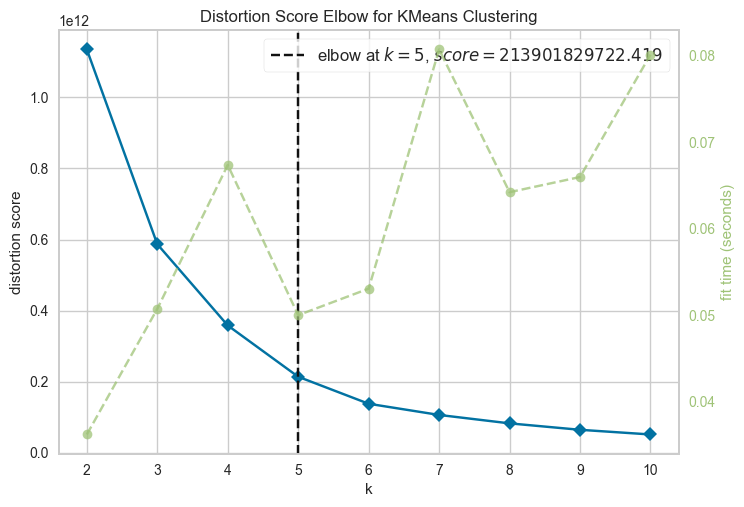

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming preprocess_df is your dataset ready for clustering
X = preprocess_df

# Initialize the KElbowVisualizer with the KMeans algorithm
visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

# Fit the data to the visualizer
visualizer3.fit(X)

# Finalize and render the figure
visualizer3.show()

In [ ]:
k3_remodel = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
k3_remodel.fit(preprocess_df)
df_k3 = preprocess_df.copy()
df_k3['Customer segment'] = k3_remodel.labels_
df_k3_analysis = df_k3.groupby('Customer segment').mean()
df_k3_analysis

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory,Age Group
Customer segment,,,,,,,,,,,,,
0,0.387097,47.074703,56329.324278,-0.057026,2.811545,-0.110962,-0.116493,-0.520921,1.981324,0.825127,-0.452609,1.057725,2.865874
1,0.436599,50.815562,106338.335735,0.010317,2.756484,0.033668,-0.000390,-0.042455,2.037464,0.959654,-0.043672,0.972622,3.102305
2,0.392962,48.511730,161852.906158,0.038751,2.922287,0.061570,0.101004,0.493088,1.986804,0.950147,0.435331,0.875367,2.950147


In [ ]:
df_k3_analysis_sorted = df_k3_analysis.sort_values(by='Spending Score', ascending=False)

# Create a mapping for the sorted segments to 'Priority 1' to 'Priority 10'
priority_mapping = {index: f'Priority {i+1}' for i, index in enumerate(df_k3_analysis_sorted.index)}

# Rename the index using the mapping
df_k3_analysis_sorted.rename(index=priority_mapping, inplace=True)

priority_mapping
df_k3_analysis_sorted.head()

,Gender,Age,Annual Income,Spending Score,Profession,Work Experience,Family Size,IncomePerMember,SpendingScoreCategory,ExperienceLevel,Income_Experience_Ratio,FamilySizeCategory,Age Group
Customer segment,,,,,,,,,,,,,
Priority 1,0.392962,48.511730,161852.906158,0.038751,2.922287,0.061570,0.101004,0.493088,1.986804,0.950147,0.435331,0.875367,2.950147
Priority 2,0.436599,50.815562,106338.335735,0.010317,2.756484,0.033668,-0.000390,-0.042455,2.037464,0.959654,-0.043672,0.972622,3.102305
Priority 3,0.387097,47.074703,56329.324278,-0.057026,2.811545,-0.110962,-0.116493,-0.520921,1.981324,0.825127,-0.452609,1.057725,2.865874


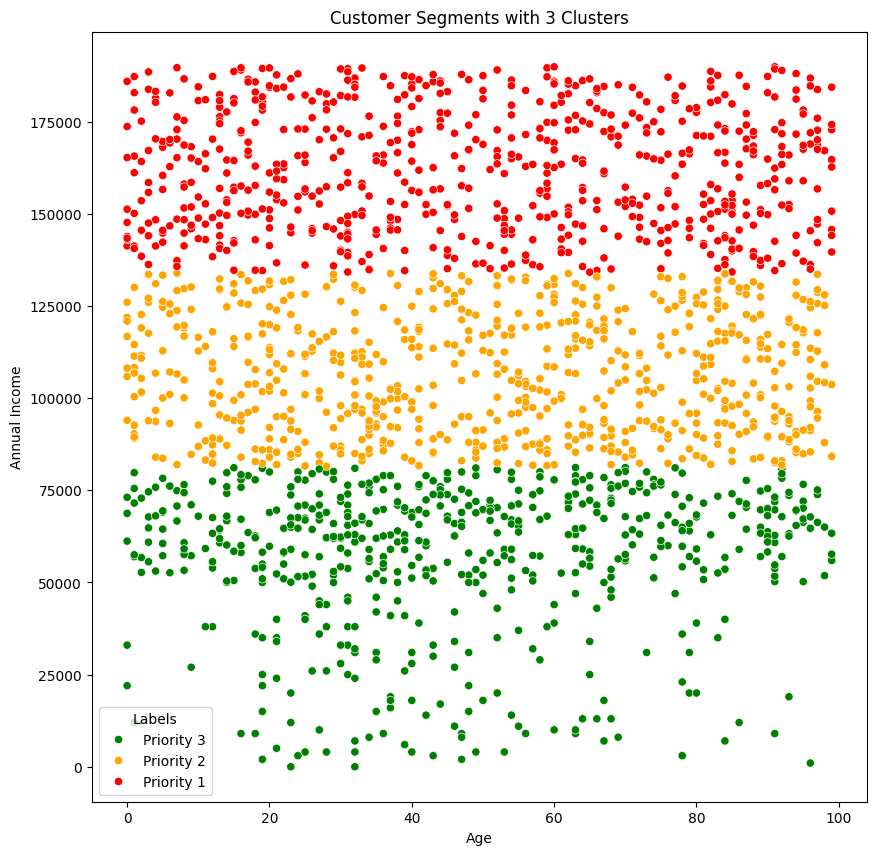

In [ ]:
df_k3['Labels'] = df_k3['Customer segment'].map(priority_mapping)
k3_x_data = df_k3['Age']
k3_y_data = df_k3['Annual Income']

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=k3_x_data,
    y=k3_y_data,
    hue=df_k3['Labels'],
    palette=['green', 'orange', 'red', ]
)
plt.title('Customer Segments with 3 Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

/var/folders/_w/y025p4hs6mbdx0xns5tf3src0000gq/T/ipykernel_50564/1483854106.py:24: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


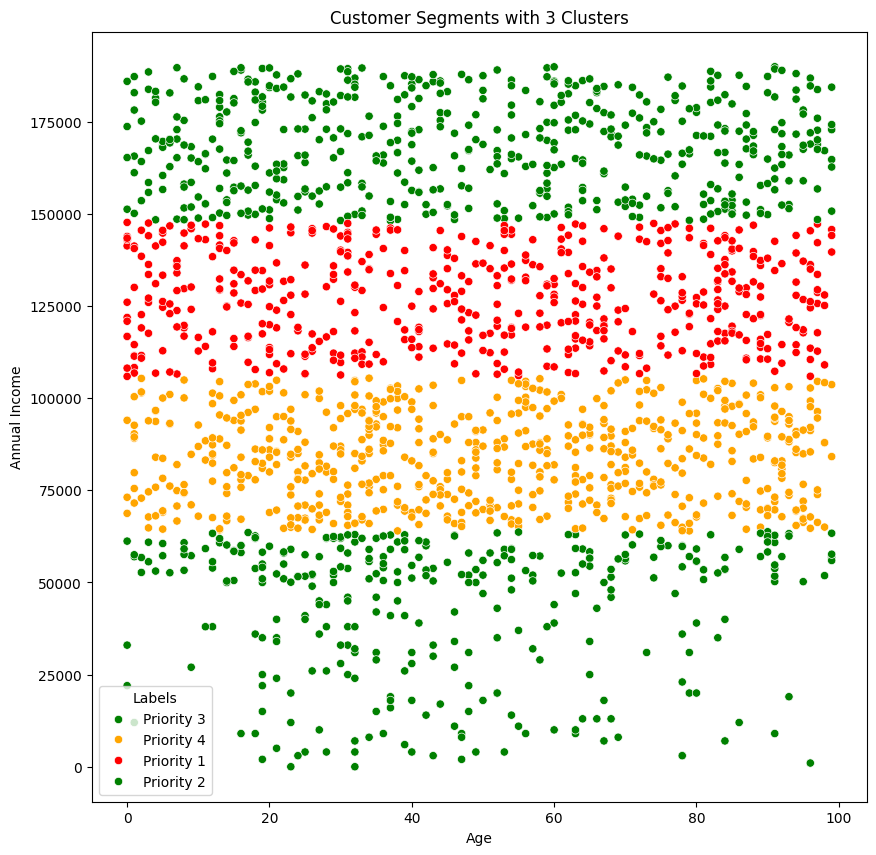

In [ ]:
k4_remodel = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
k4_remodel.fit(preprocess_df)
df_k4 = preprocess_df.copy()
df_k4['Customer segment'] = k4_remodel.labels_
df_k4_analysis = df_k4.groupby('Customer segment').mean()
df_k4_analysis

df_k4_analysis_sorted = df_k4_analysis.sort_values(by='Spending Score', ascending=False)

# Create a mapping for the sorted segments to 'Priority 1' to 'Priority 10'
priority_mapping = {index: f'Priority {i+1}' for i, index in enumerate(df_k4_analysis_sorted.index)}

# Rename the index using the mapping
df_k4_analysis_sorted.rename(index=priority_mapping, inplace=True)

priority_mapping
df_k4_analysis_sorted.head()

df_k4['Labels'] = df_k4['Customer segment'].map(priority_mapping)
k4_x_data = df_k4['Age']
k4_y_data = df_k4['Annual Income']

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=k4_x_data,
    y=k4_y_data,
    hue=df_k4['Labels'],
    palette=['green', 'orange', 'red', ]
)
plt.title('Customer Segments with 3 Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

# Comparing the 3 vs 4 cluster in customer segmentation
- The result is relative similar if we take age vs annual income perspective.
- Therefore, we will first use 3 cluster as our main params to further discuss different features.

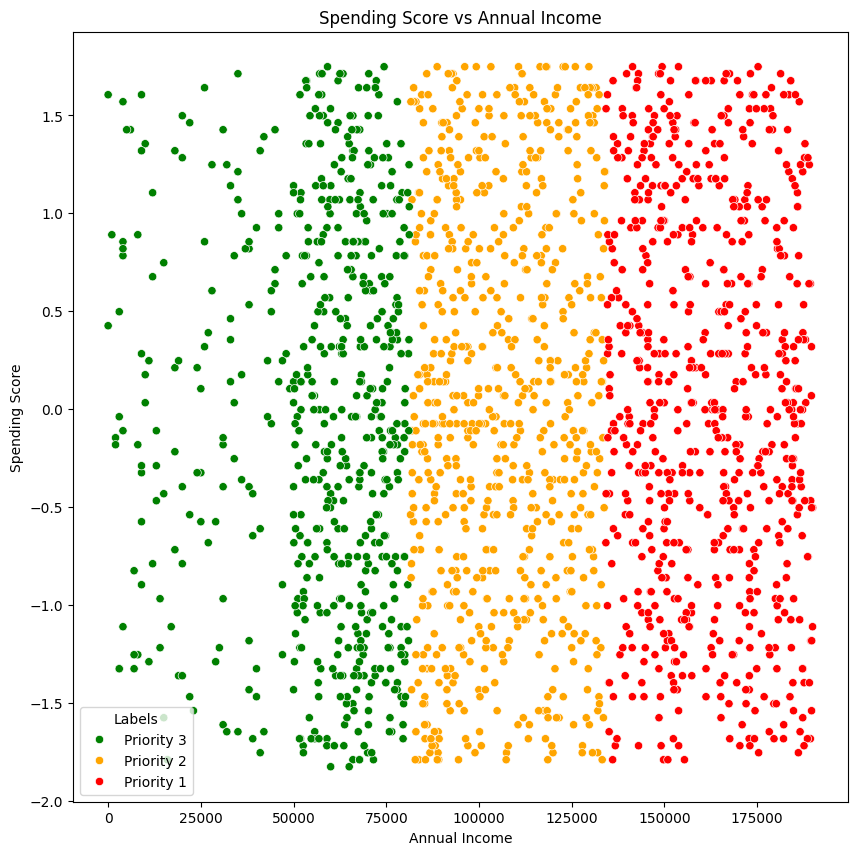

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=df_k3['Annual Income'],
    y=df_k3['Spending Score'],
    hue=df_k3['Labels'],
    palette=['green', 'orange', 'red']
)
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


['Healthcare' 'Engineer' 'Engineer' ... 'Healthcare' 'Executive'
 'Entertainment']
   Gender  Age  Annual Income  Spending Score     Profession  Work Experience  \
0       1   19          15000       -0.431850     Healthcare        -0.787837   
1       1   21          35000        1.069755       Engineer        -0.278342   
2       0   20          86000       -1.611684       Engineer        -0.787837   
3       0   23          59000        0.926745         Lawyer        -1.042584   
4       0   31          38000       -0.396098  Entertainment        -0.533089   

   Family Size  IncomePerMember  SpendingScoreCategory  ExperienceLevel  \
0     0.123358        -1.025051                      1                0   
1    -0.384815        -0.816114                      3                0   
2    -1.401161         1.145689                      4                0   
3    -0.892988        -0.345457                      0                0   
4     1.139704        -0.956872                      2 

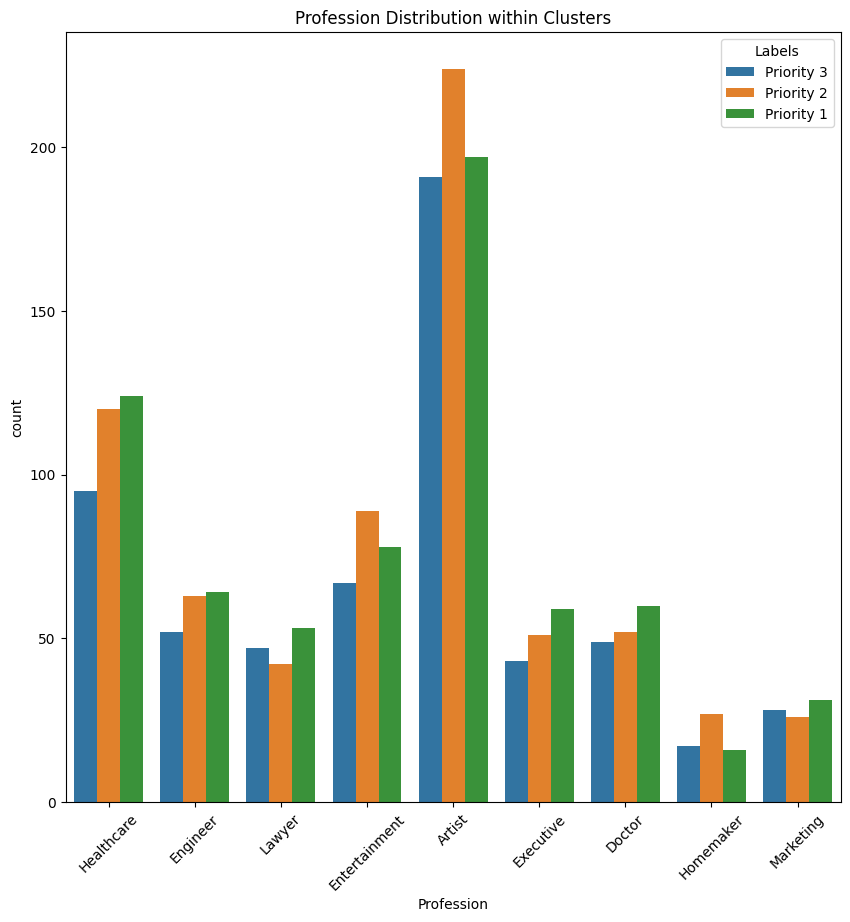

In [ ]:
label_encoder.fit(original_profession_labels)
replaced = label_encoder.inverse_transform(df_k3['Profession'])
print(replaced)

# Add the original labels back to the DataFrame
df_k3['Profession'] = replaced
print(df_k3.head())

plt.figure(figsize=(10, 10))
sns.countplot(x='Profession', hue='Labels', data=df_k3)
plt.title('Profession Distribution within Clusters')
plt.xticks(rotation=45)
plt.show()


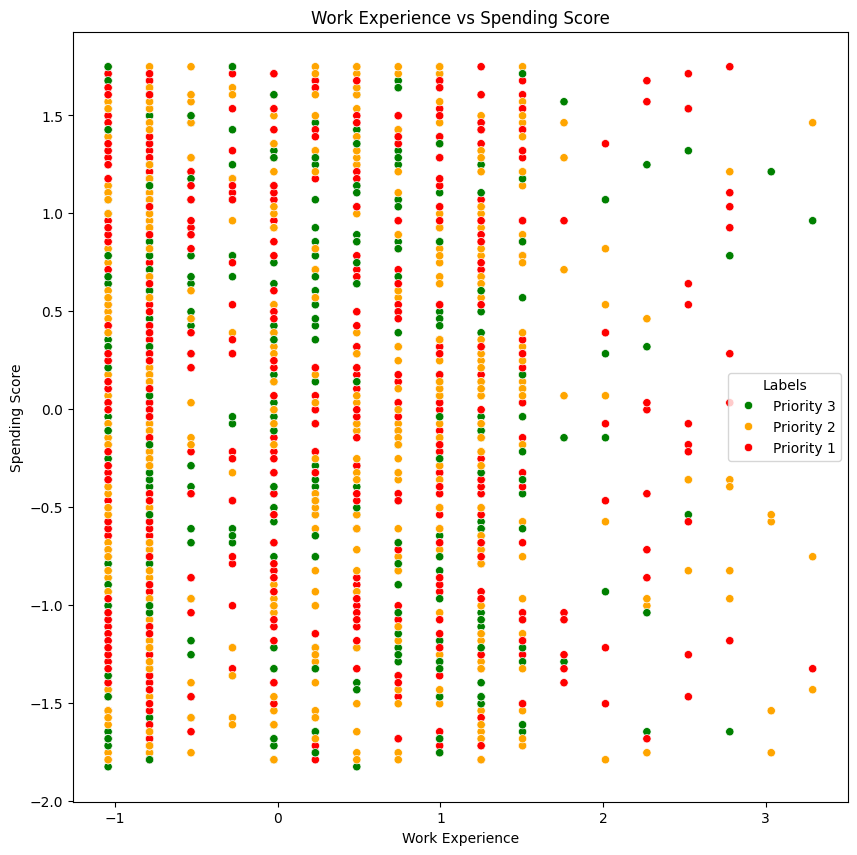

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=df_k3['Work Experience'],
    y=df_k3['Spending Score'],
    hue=df_k3['Labels'],
    palette=['green', 'orange', 'red']
)
plt.title('Work Experience vs Spending Score')
plt.xlabel('Work Experience')
plt.ylabel('Spending Score')
plt.show()


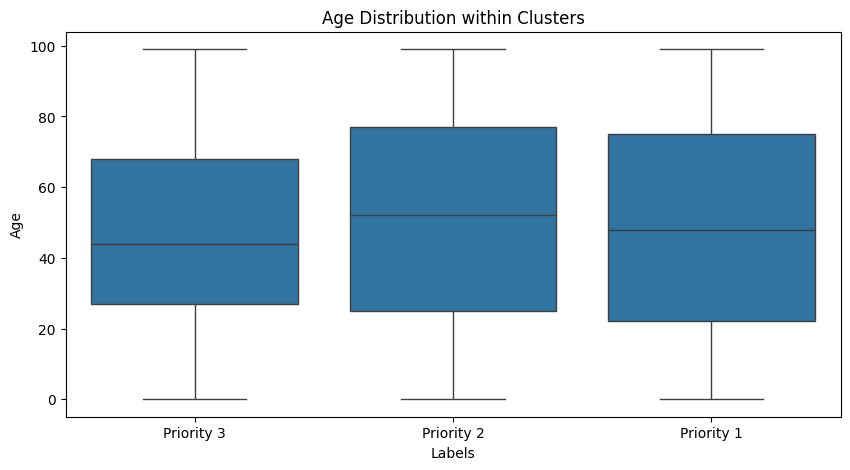

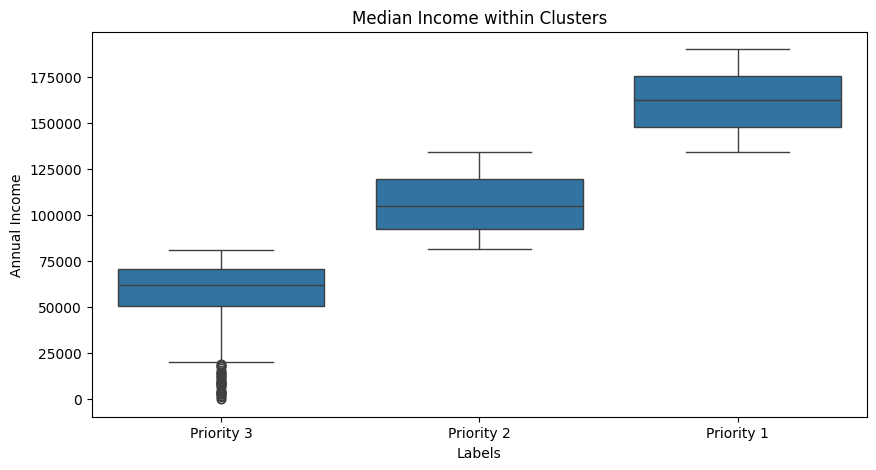

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Labels', y='Age', data=df_k3)
plt.title('Age Distribution within Clusters')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Labels', y='Annual Income', data=df_k3)
plt.title('Median Income within Clusters')
plt.show()
